In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
np.set_printoptions(precision=0)  # reduced display precision on numpy arrays

In [6]:
data = pd.read_csv('cars_dataset.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
m=data.mileage.str.split(n=1,expand=True)
data['mileage']=m[0]
m=data.engine.str.split(n=1,expand=True)
data['engine']=m[0]
m=data.max_power.str.split(n=1,expand=True)
data['max_power']=m[0]
# data.head()

In [10]:
data.drop(['name','torque'], axis = 1, inplace = True)

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["fuel"] = le.fit_transform(data["fuel"])
data["seller_type"] = le.fit_transform(data["seller_type"])
data["transmission"] = le.fit_transform(data["transmission"])
data["owner"] = le.fit_transform(data["owner"])
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,1,0,23.4,1248,74,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498,103.52,5.0
2,2006,158000,140000,3,1,1,4,17.7,1497,78,5.0
3,2010,225000,127000,1,1,1,0,23.0,1396,90,5.0
4,2007,130000,120000,3,1,1,0,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,3,1,1,0,18.5,1197,82.85,5.0
8124,2007,135000,119000,1,1,1,1,16.8,1493,110,5.0
8125,2009,382000,120000,1,1,1,0,19.3,1248,73.9,5.0
8126,2013,290000,25000,1,1,1,0,23.57,1396,70,5.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int32(4), int64(3), object(3)
memory usage: 571.6+ KB


In [13]:
data["mileage"] = pd.to_numeric(data["mileage"])
data["engine"] = pd.to_numeric(data["engine"])

In [14]:
data = data.drop("max_power", axis=1) 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   seats          7907 non-null   float64
dtypes: float64(3), int32(4), int64(3)
memory usage: 508.1 KB


In [16]:
mean_temp = data["mileage"].mean()
data["mileage"]= data["mileage"].fillna(mean_temp)
mean_temp = data["engine"].mean()
data["engine"]= data["engine"].fillna(mean_temp)
mean_temp = data["seats"].mean()
data["seats"]= data["seats"].fillna(mean_temp)

In [17]:
data.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
seats            0
dtype: int64

In [18]:
data.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,1.891117,0.890502,0.870817,0.814345,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,1.002313,0.394459,0.335423,1.221644,3.981875,497.017504,0.946450
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,1.000000,1.000000,1.000000,0.000000,16.800000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,1.000000,1.000000,0.000000,19.418783,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,3.000000,1.000000,1.000000,2.000000,22.277500,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,14.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   seats          8128 non-null   float64
dtypes: float64(3), int32(4), int64(3)
memory usage: 508.1 KB


In [20]:
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,3,1,1,0,18.50,1197.0,5.0
8124,2007,135000,119000,1,1,1,1,16.80,1493.0,5.0
8125,2009,382000,120000,1,1,1,0,19.30,1248.0,5.0
8126,2013,290000,25000,1,1,1,0,23.57,1396.0,5.0


In [21]:
# NORMALIZAR LOS DATOS
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

data_normalizada = mean_norm(data)
print(data_normalizada)

          year  selling_price  km_driven      fuel  seller_type  transmission  \
0     0.048461      -0.233514   1.338280 -0.889061      0.27759      0.385135   
1     0.048461      -0.332739   0.887356 -0.889061      0.27759      0.385135   
2    -1.929656      -0.595683   1.241022  1.106324      0.27759      0.385135   
3    -0.940598      -0.512583   1.011139 -0.889061      0.27759      0.385135   
4    -1.682392      -0.630412   0.887356  1.106324      0.27759      0.385135   
...        ...            ...        ...       ...          ...           ...   
8123 -0.198804      -0.394754   0.710523  1.106324      0.27759      0.385135   
8124 -1.682392      -0.624210   0.869673 -0.889061      0.27759      0.385135   
8125 -1.187862      -0.317855   0.887356 -0.889061      0.27759      0.385135   
8126 -0.198804      -0.431963  -0.792557 -0.889061      0.27759      0.385135   
8127 -0.198804      -0.431963  -0.792557 -0.889061      0.27759      0.385135   

         owner   mileage   

In [22]:
#ASIGNAR X_TRAIN_Y_TRAIN
X_train = data_normalizada.iloc[:,[0,2,3,4,5,6,7,8,9]]
y_train = data_normalizada.iloc[:,1]

In [23]:
X_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,0.048461,1.338280,-0.889061,0.27759,0.385135,-0.666598,0.999835,-0.423778,-0.440297
1,0.048461,0.887356,-0.889061,0.27759,0.385135,0.970540,0.432263,0.079223,-0.440297
2,-1.929656,1.241022,1.106324,0.27759,0.385135,2.607678,-0.431652,0.077211,-0.440297
3,-0.940598,1.011139,-0.889061,0.27759,0.385135,-0.666598,0.899379,-0.126002,-0.440297
4,-1.682392,0.887356,1.106324,0.27759,0.385135,-0.666598,-0.833472,-0.323178,-0.440297
...,...,...,...,...,...,...,...,...,...
8123,-0.198804,0.710523,1.106324,0.27759,0.385135,-0.666598,-0.230741,-0.526390,-0.440297
8124,-1.682392,0.869673,-0.889061,0.27759,0.385135,0.151971,-0.657676,0.069163,-0.440297
8125,-1.187862,0.887356,-0.889061,0.27759,0.385135,-0.666598,-0.029831,-0.423778,-0.440297
8126,-0.198804,-0.792557,-0.889061,0.27759,0.385135,-0.666598,1.042528,-0.126002,-0.440297


In [24]:
y_train

0      -0.233514
1      -0.332739
2      -0.595683
3      -0.512583
4      -0.630412
          ...   
8123   -0.394754
8124   -0.624210
8125   -0.317855
8126   -0.431963
8127   -0.431963
Name: selling_price, Length: 8128, dtype: float64

In [25]:
print("Los 5 primeros elementos en X_train son:\n", X_train[:5])
print("Type of X_train:",type(X_train))

Los 5 primeros elementos en X_train son:
        year  km_driven      fuel  seller_type  transmission     owner  \
0  0.048461   1.338280 -0.889061      0.27759      0.385135 -0.666598   
1  0.048461   0.887356 -0.889061      0.27759      0.385135  0.970540   
2 -1.929656   1.241022  1.106324      0.27759      0.385135  2.607678   
3 -0.940598   1.011139 -0.889061      0.27759      0.385135 -0.666598   
4 -1.682392   0.887356  1.106324      0.27759      0.385135 -0.666598   

    mileage    engine     seats  
0  0.999835 -0.423778 -0.440297  
1  0.432263  0.079223 -0.440297  
2 -0.431652  0.077211 -0.440297  
3  0.899379 -0.126002 -0.440297  
4 -0.833472 -0.323178 -0.440297  
Type of X_train: <class 'pandas.core.frame.DataFrame'>


In [26]:
print("Los 5 primeros elementos en y_train son:\n", y_train[:5])
print("Type of y_train:",type(y_train))

Los 5 primeros elementos en y_train son:
 0   -0.233514
1   -0.332739
2   -0.595683
3   -0.512583
4   -0.630412
Name: selling_price, dtype: float64
Type of y_train: <class 'pandas.core.series.Series'>


In [27]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (8128, 9)
The shape of y_train is: (8128,)
We have m = 8128 training examples


In [28]:
b_init = 785.1811367994083
w_init = np.array([ 0.24251783, -0.2118112 , -0.13304738, -0.05846624, -0.15008277,
       -0.32419281, -0.00862021,  0.00996006, 0.00996006])

print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")


w_init shape: (9,), b_init type: <class 'float'>


In [29]:
# Predicción única elemento por elemento
def predict_single_loop(x, w, b): 
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b               
    return p

In [30]:
# en forma vectorial
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p 

In [31]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X.iloc[i].values, w) + b          
        cost = cost + (f_wb_i - y[i])**2    
    cost = cost / (2 * m)                         
    return cost

In [32]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Costo óptimo w : {cost}')


Costo óptimo w : 308255.07439399813


In [33]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(número de ejemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X.iloc[i].values, w) + b) - y[i] 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X.iloc[i, j]
            #print("dj_dw: ",dj_dw)
        dj_db = dj_db + err
        #print("dj_db: ",dj_db)
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m     

    return dj_db, dj_dw

In [34]:
#Calcula y muestra la gradiente
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db:0.15f}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 785.181136799408023
dj_dw at initial w,b: 
 [ 0. -0.  0.  0.  0. -0.  0. -0. -0.]


In [35]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in) 
    b = b_in
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)  
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        if i<100000:   
            J_history.append( cost_function(X, y, w, b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.15f}   ")
    return w, b, J_history 

In [36]:
# inicializando parámetros
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 100
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)


Iteration    0: Cost 0.499937986774668   
Iteration   10: Cost 0.499933012052500   
Iteration   20: Cost 0.499928037422749   
Iteration   30: Cost 0.499923062885424   
Iteration   40: Cost 0.499918088440512   
Iteration   50: Cost 0.499913114088020   
Iteration   60: Cost 0.499908139827941   
Iteration   70: Cost 0.499903165660270   
Iteration   80: Cost 0.499898191585017   
Iteration   90: Cost 0.499893217602169   


In [37]:
predict([[0.048461, 1.338280, -0.889061, 0.27759, 0.385135,-0.666598,0.999835,
          -0.423778,-0.440297]], w_final, b_final)

array([-3.e-05])

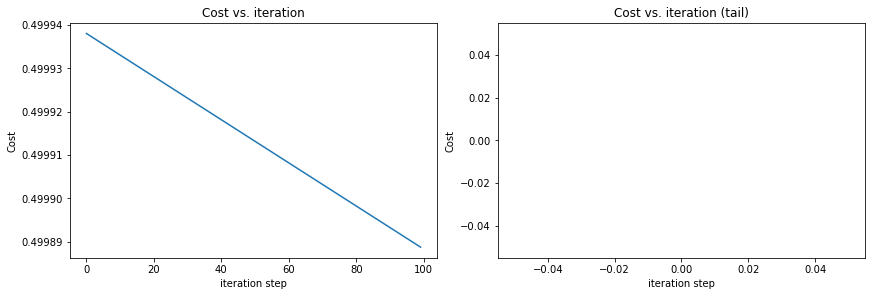

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()